In [1]:
#Here are the imports we'll use
import pandas as pd
import re
from nltk import FreqDist

In [2]:
#Let's grab all the tweets from https://data.world/data4democracy/far-right/file/sample_tweets.json. Here is the URL:
df = pd.read_json('https://query.data.world/s/bsbt4eb4g8sm4dsgi7w2ecbkt')

In [3]:
#Let's take a look at it
df
#Does anyone know the difference between message and text?

,created,description,followers,friends_count,hashtags,id_str,loc,message,name,original_id,original_name,retweet,retweet_count,text,topics,user_created
0,2017-01-30 02:00:02,@mashable entertainment reporter. Proud native...,7912,6742,[],825886254981976064,Los Angeles,Was curious what was leading Breitbart. In cas...,saba_h,NaN,None,N,0,Was curious what was leading Breitbart. In cas...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2010-08-22 04:16:16
1,2017-01-30 02:00:02,Novelist/freelance editor; Producer and Host ...,2576,2808,[],825886256806690816,Colorado,RT @RaheemKassam: College Lecturer Punched In ...,LichenCraig,1.251287e+08,Raheem Kassam,Y,0,RT @RaheemKassam: College Lecturer Punched In ...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2012-01-31 03:42:35
2,2017-01-30 02:00:02,NJ conservative.Christian.God Bless the U.S. D...,1731,2408,"[""CrybabiesCantLead""]",825886258283085824,None,RT @Darren32895836: Head Clown @chuckschumer p...,RostaMan09,4.761065e+09,STOCK MONSTER,Y,0,RT @Darren32895836: Head Clown @chuckschumer p...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2009-07-28 01:27:11
3,2017-01-30 02:00:02,Mother/wife~ Constitutionalist ~ conservative ...,1231,1461,[],825886258798936064,United States,"RT @Timtravels007: On 12 September 2001, Ameri...",roadtosingapore,7.275292e+17,Deplorable Tim 🇺🇸,Y,0,"RT @Timtravels007: On 12 September 2001, Ameri...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2011-01-27 03:06:46
4,2017-01-30 02:00:02,#MAGA. Owner of guns and partially blind so I ...,266,343,"[""AmericaFirst"", ""TrumpCabinet"", ""PresidentTru...",825886257746149376,State Of Confusion,RT @bfraser747: 🇺🇸🇺🇸 #AmericaFirst \n\nStop de...,pilikianocan,2.748912e+08,Brian Fraser,Y,0,RT @bfraser747: 🇺🇸🇺🇸 #AmericaFirst \n\nStop de...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-06-21 19:29:25
5,2017-01-30 02:00:03,None,211,377,"[""MAGA"", ""trump"", ""PresidentTrump""]",825886259210022912,None,RT @ed_hooley: @realDonaldTrump JOHN MCCAIN OR...,kdogg247,1.464560e+09,Ted Hooley 🇱🇷,Y,0,RT @ed_hooley: @realDonaldTrump JOHN MCCAIN OR...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-09-27 14:47:34
6,2017-01-30 02:00:03,"husband, father, Mississippi State Bulldog fan...",235,684,"[""MAGA""]",825886258975088640,"Alabama, USA",RT @Westxgal: No Muslim country would allow Th...,llstokes72,5.259542e+08,CountingBlessings,Y,0,RT @Westxgal: No Muslim country would allow Th...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2013-09-07 21:20:47
7,2017-01-30 02:00:02,It's just me. WYSIWYG. If I have something to ...,351,820,"[""StopPresidentBannon""]",825886258496835584,Halfway up the stairs.,"RT @ORachaelO: Donald Trump, King of Cucks. Ir...",Tylertas,2.340916e+09,Rachael Prior,Y,0,"RT @ORachaelO: Donald Trump, King of Cucks. Ir...","[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2010-08-19 14:57:56
8,2017-01-30 02:00:03,"THE Holly Marsh. Mom, Exercise and Food Enthus...",164,154,"[""MuslimBan"", ""fakenews"", ""MAGA""]",825886260883501056,"Minnesota, USA",RT @Lrihendry: I remember the 6 Month #MuslimB...,Trendy_Chicken,1.292359e+08,Lori Hendry,Y,0,RT @Lrihendry: I remember the 6 Month #MuslimB...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-08-02 21:16:46
9,2017-01-30 02:00:03,Just an Anonymous guy who hates stupidity. Hum...,485,914,[],825886260891881472,"Somewhere, maybe",RT @woke8yearold: Punch nazis\nPunch Breitbart...,NumbingDisaster,2.598183e+09,Aleph,Y,0,RT @woke8yearold: Punch nazis\nPunch Breitbart...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2014-06-12 14:11:57


In [4]:
print('Now we have all the tweets inside a {}'.format(type(df)))
print('There are a total of {} tweets in our dataset'.format(len(df)))

Now we have all the tweets inside a <class 'pandas.core.frame.DataFrame'>
There are a total of 5000 tweets in our dataset


In [5]:
#Let's see what different columns we have
print('Here are the columns we have: \n   {}'.format(df.columns))

Here are the columns we have: 
   Index(['created', 'description', 'followers', 'friends_count', 'hashtags',
       'id_str', 'loc', 'message', 'name', 'original_id', 'original_name',
       'retweet', 'retweet_count', 'text', 'topics', 'user_created'],
      dtype='object')


It looks like the topics section is the same for all tweets. These were the search terms used to collect the data

In [6]:
#OK, let's look at all the hashtags
df['hashtags']

0                                                      []
1                                                      []
2                                   ["CrybabiesCantLead"]
3                                                      []
4       ["AmericaFirst", "TrumpCabinet", "PresidentTru...
5                     ["MAGA", "trump", "PresidentTrump"]
6                                                ["MAGA"]
7                                 ["StopPresidentBannon"]
8                       ["MuslimBan", "fakenews", "MAGA"]
9                                                      []
10                                                     []
11      ["NotMyPresident", "LockHerUp", "MAGA", "Trump...
12                                                     []
13                                                     []
14                       ["NoBanNoWall", "Trump", "MAGA"]
15                 ["SpicerFacts", "MAGA", "NoBanNoWall"]
16                                                     []
17      ["Day1

## Hashtags analysis

In [7]:
#Let's see what hashtags are most common
#As we can see from above, we'll need a way to extract individual hashtags from tweets with multiple
def extract_hashtags(hashtag):
    return re.findall(r'"([^"]*)"', hashtag)


In [8]:
#Now let's run through the dataframe and put all the hashtags into one list
tags = []
for x in range(round(len(df)/100)):
    if len(df['hashtags'][x]) != 2: # i.e. []
        a = extract_hashtags(df['hashtags'][x])
        tags.append(a)
print(tags)

[['CrybabiesCantLead'], ['AmericaFirst', 'TrumpCabinet', 'PresidentTrump'], ['MAGA', 'trump', 'PresidentTrump'], ['MAGA'], ['StopPresidentBannon'], ['MuslimBan', 'fakenews', 'MAGA'], ['NotMyPresident', 'LockHerUp', 'MAGA', 'TrumpsArmy', 'TrumpStrong', 'AmericaFirst'], ['NoBanNoWall', 'Trump', 'MAGA'], ['SpicerFacts', 'MAGA', 'NoBanNoWall'], ['Day1Promises', 'NoBanNoWall', 'MuslimBan', 'MAGA'], ['TRUMP'], ['MAGA'], ['maga', 'BuildTheWall', 'draintheswamp', 'muslimban'], ['MuslimBan', 'tcot', 'Trump420', 'MAGA', 'TrumpStrong', 'POTUSTrump'], ['MAGA', 'Islam'], ['NoBanNoWall'], ['MAGA', 'WeThePeople', 'NRA'], ['MAGA', 'MuslimBan'], ['TrumpsArmy', 'TrumpStrong', 'NoBanNoWall', 'MAGA'], ['MAGA'], ['tbt', 'MAGA', 'TrumpTrain'], ['MAGA'], ['MAGA', 'SundayMorning']]


In [9]:
#Now we have a list of lists. Let's flatten it into a single list
all_hastags = [item for sublist in tags for item in sublist]
print(all_hastags)

['CrybabiesCantLead', 'AmericaFirst', 'TrumpCabinet', 'PresidentTrump', 'MAGA', 'trump', 'PresidentTrump', 'MAGA', 'StopPresidentBannon', 'MuslimBan', 'fakenews', 'MAGA', 'NotMyPresident', 'LockHerUp', 'MAGA', 'TrumpsArmy', 'TrumpStrong', 'AmericaFirst', 'NoBanNoWall', 'Trump', 'MAGA', 'SpicerFacts', 'MAGA', 'NoBanNoWall', 'Day1Promises', 'NoBanNoWall', 'MuslimBan', 'MAGA', 'TRUMP', 'MAGA', 'maga', 'BuildTheWall', 'draintheswamp', 'muslimban', 'MuslimBan', 'tcot', 'Trump420', 'MAGA', 'TrumpStrong', 'POTUSTrump', 'MAGA', 'Islam', 'NoBanNoWall', 'MAGA', 'WeThePeople', 'NRA', 'MAGA', 'MuslimBan', 'TrumpsArmy', 'TrumpStrong', 'NoBanNoWall', 'MAGA', 'MAGA', 'tbt', 'MAGA', 'TrumpTrain', 'MAGA', 'MAGA', 'SundayMorning']


In [10]:
#OK, now let's create a frequency distribution of all the hashtags and plot it
fdist = FreqDist(all_hastags)

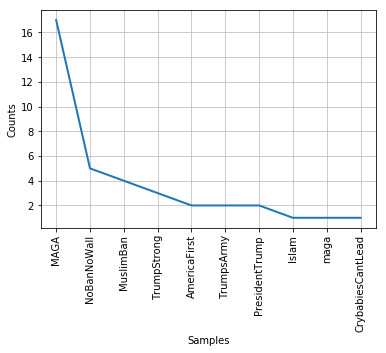

In [11]:
fdist.plot(10)

## False positives

This plot looks roughly like what I'd expect, with one exception. #NoBanNoWall seems to be someone opposed to Trump. Let's look at this in more detail to see if we have a false positive

In [12]:
#Let's make a df with tweets that could be false positives
poss_false_positive = df[df['hashtags'].str.contains('NoBanNoWall')]
poss_false_positive

,created,description,followers,friends_count,hashtags,id_str,loc,message,name,original_id,original_name,retweet,retweet_count,text,topics,user_created
14,2017-01-30 02:00:03,Only here to annoy the Drumpf,12,3,"[""NoBanNoWall"", ""Trump"", ""MAGA""]",825886262540251136,None,Hi @realDonaldTrump do you still think that it...,automatedstench,NaN,None,N,0,Hi @realDonaldTrump do you still think that it...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2017-01-07 17:25:26
15,2017-01-30 02:00:03,None,12,2,"[""SpicerFacts"", ""MAGA"", ""NoBanNoWall""]",825886262645112832,None,Hey @SeanSpicer Bush 41 got lots more Electora...,SeanSp1cer,NaN,None,N,0,Hey @SeanSpicer Bush 41 got lots more Electora...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2017-01-23 20:26:57
17,2017-01-30 02:00:04,None,10,2,"[""Day1Promises"", ""NoBanNoWall"", ""MuslimBan"", ""...",825886263567872000,None,Hey @realDonaldTrump have you renegotiated NAF...,PromisesDay1,NaN,None,N,0,Hey @realDonaldTrump have you renegotiated NAF...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2017-01-20 13:47:37
27,2017-01-30 02:00:07,Philly- Nationalist MAGA- No White Guilt/ No R...,522,525,"[""NoBanNoWall""]",825886275836198912,"Philadelphia, PA",#NoBanNoWall\n\nThere's gonna be a wall\nBelow...,Carl_Anthony215,NaN,None,N,0,#NoBanNoWall\n\nThere's gonna be a wall\nBelow...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-07-03 21:53:10
40,2017-01-30 02:00:08,"Georgia Girl, Married to college sweetheart 40...",1734,2089,"[""TrumpsArmy"", ""TrumpStrong"", ""NoBanNoWall"", ""...",825886283385942016,None,RT @10thAmendment: I'll just put this right he...,SouthwithTrump,2.158708e+07,Proud Patriot Beth,Y,0,RT @10thAmendment: I'll just put this right he...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-03-03 00:41:00
235,2017-01-30 02:00:40,None,0,41,"[""MuslimBan"", ""BatteryPark"", ""Terminal4"", ""JFK...",825886416559304704,None,RT @AnBeOnd: Another looky what we have here 🤔...,potter4evr,2.950103e+09,infini_dee_,Y,0,RT @AnBeOnd: Another looky what we have here 🤔...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2011-10-05 03:07:23
901,2017-01-30 02:02:29,Not all those who wander are lost. - J.R.R. To...,3572,4814,"[""NoBanNoWall"", ""MuslimBan""]",825886873155465216,"Santo Domingo, Dominican Republic",RT @FunnyAnimals: POLL: Should Hollywood celeb...,Snikk,1.965481e+06,I ❤️ President Trump,Y,0,RT @FunnyAnimals: POLL: Should Hollywood celeb...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2009-04-19 12:48:33
1031,2017-01-30 02:02:53,Build the wall!! Drain the Swamp! 66 - still w...,285,500,"[""NoBanNoWall"", ""nomuslimban""]",825886975076999168,None,#NoBanNoWall #nomuslimban what? I thought the...,MarshaPeters919,NaN,None,N,0,#NoBanNoWall #nomuslimban what? I thought the...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2016-10-09 01:05:36
1172,2017-01-30 02:03:17,Destination Unknown ?\nwatch your damn threats...,155,310,"[""NoBanNoWall"", ""MuslimBan""]",825887074964426752,KAPU,RT @FunnyAnimals: POLL: Should Hollywood celeb...,melodiehoku,1.965481e+06,I ❤️ President Trump,Y,0,RT @FunnyAnimals: POLL: Should Hollywood celeb...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2017-01-01 23:36:19
1440,2017-01-30 02:04:03,Father of the most beautiful little girl. KC C...,29,105,"[""racism"", ""america"", ""NoBanNoWall"", ""immigrat...",825887266400776192,None,Wow... \n#racism #america #NoBanNoWall #immigr...,alidpellakc,NaN,None,N,0,Wow... \n#racism #america #NoBanNoWall #immigr...,"[cucks, breitbart, Oath Keeper, III%, MAGA, WA...",2012-09-05 14:51:50


In [13]:
pd.set_option('display.max_colwidth', -1) #This tells pandas to make the column width the size of the lagest column, so nothing is lost
poss_false_positive['message']

14      Hi @realDonaldTrump do you still think that it is ok to lust after your daughter? #NoBanNoWall #Trump #MAGA https://t.co/rbBVOAeDYp                  
15      Hey @SeanSpicer Bush 41 got lots more Electoral College votes than Cheeto-face  #SpicerFacts #MAGA #NoBanNoWall… https://t.co/77GekGii7i             
17      Hey @realDonaldTrump have you renegotiated NAFTA already? #Day1Promises #NoBanNoWall #MuslimBan #MAGA https://t.co/q15verleeU                        
27      #NoBanNoWall\n\nThere's gonna be a wall\nBelow budget &amp; ahead of time, cucks\n😎🇺🇸\n\nYou can thank your savior Obama for… https://t.co/w9UsskY6uv
40      RT @10thAmendment: I'll just put this right here....‼️\n#TrumpsArmy \n#TrumpStrong \n#NoBanNoWall \n#MAGA https://t.co/202tvkymMd                    
235     RT @AnBeOnd: Another looky what we have here 🤔 #MuslimBan #BatteryPark #Terminal4 #JFKAirport #NoBanNoWall #WorldWarIII #OHare…                      
901     RT @FunnyAnimals: POLL: Should Hollywood cel

Looks like a mix of both. That's real data!